In [52]:
import pandas as pd

path = "./datasets/customer_shopping_data.csv"

customer_shopping_df = pd.read_csv(path, sep=",")

# 데이터 확인하기
display(customer_shopping_df)

# 컬럼의 자세한 정보 확인하기
customer_shopping_df.info()




,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [53]:
# 컬럼별 결측치 개수 검사
missing_values = customer_shopping_df.isnull().sum()
print(missing_values)

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [25]:
customer_shopping_df.duplicated().sum()

0

KeyError: 'price'

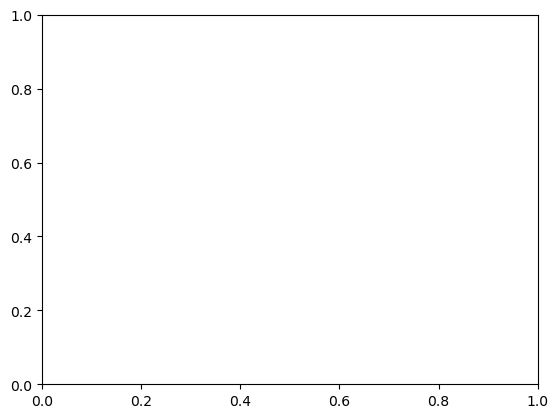

In [61]:
display(customer_shopping_df.plot(x="customer_id", y="price", kind="scatter"))
display(customer_shopping_df[["price"]].describe().T)
print(customer_shopping_df[["price"]].median())


In [55]:
customer_shopping_df.duplicated().sum()

customer_shopping_df.duplicated(subset=['customer_id']).sum()

0

In [56]:
from datetime import datetime

customer_shopping_df['invoice_date'] = pd.to_datetime(customer_shopping_df['invoice_date'], dayfirst=True)
customer_shopping_df

customer_shopping_df['Recency'] = (datetime.now() - customer_shopping_df['invoice_date']).dt.days
customer_shopping_df = customer_shopping_df.drop('invoice_date', axis=1)
customer_shopping_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,Recency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,424
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,660
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,693
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,870
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,709
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,377
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,741
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,919
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,931


In [57]:
customer_shopping_df['Frequency'] = 1
customer_shopping_df

#중복참여 불가로 인한 결과라 함

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,Recency,Frequency
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,Kanyon,424,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,660,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,693,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,Metropol AVM,870,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,709,1
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,377,1
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,741,1
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,Metrocity,919,1
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,Istinye Park,931,1


In [58]:
customer_shopping_df['Monetary'] = customer_shopping_df['quantity'] * customer_shopping_df['price']
customer_shopping_df = customer_shopping_df.drop(['quantity', 'price'], axis=1)
customer_shopping_df

,invoice_no,customer_id,gender,age,category,payment_method,shopping_mall,Recency,Frequency,Monetary
0,I138884,C241288,Female,28,Clothing,Credit Card,Kanyon,424,1,7502.00
1,I317333,C111565,Male,21,Shoes,Debit Card,Forum Istanbul,660,1,5401.53
2,I127801,C266599,Male,20,Clothing,Cash,Metrocity,693,1,300.08
3,I173702,C988172,Female,66,Shoes,Credit Card,Metropol AVM,870,1,15004.25
4,I337046,C189076,Female,53,Books,Cash,Kanyon,709,1,242.40
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,Credit Card,Kanyon,377,1,293.25
99453,I325143,C569580,Male,27,Food & Beverage,Cash,Forum Istanbul,741,1,20.92
99454,I824010,C103292,Male,63,Food & Beverage,Debit Card,Metrocity,919,1,20.92
99455,I702964,C800631,Male,56,Technology,Cash,Istinye Park,931,1,16800.00


In [63]:
customer_shopping_df_rfm = customer_shopping_df[["Recency", "Frequency", "Monetary"]]

In [60]:
customer_shopping_df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    99457 non-null  int64  
 1   Frequency  99457 non-null  int64  
 2   Monetary   99457 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [64]:
from sklearn.preprocessing import MinMaxScaler
#  공식 (X - MIN) / (MAX - MIN)
normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(customer_shopping_df_rfm)
rfm_normalization = pd.DataFrame(rfm_normalization, columns=customer_shopping_df_rfm.columns)

display(rfm_normalization)

,Recency,Frequency,Monetary
0,0.270101,0.0,0.285648
1,0.566583,0.0,0.205614
2,0.608040,0.0,0.011235
3,0.830402,0.0,0.571505
4,0.628141,0.0,0.009037
...,...,...,...
99452,0.211055,0.0,0.010974
99453,0.668342,0.0,0.000598
99454,0.891960,0.0,0.000598
99455,0.907035,0.0,0.639928


### 마케팅적 요소
- Recency : 얼마나 최근에 구매했는가
- Frequency : 얼마나 자주 구매했는가
- Monetary : 얼마나 많은 금액을 지출했는가
1. Recency 값이 낮을수록 고객이 최근에 구매
2. Frequency 값이 낮은 고객들에게 재구매를 유도
3. Monetary 값이 높은 고객은 기업에게 더 많은 가치를 제공